# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [82]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
DIR = "data/"
training_file = DIR + "train.p"
validation_file= DIR + "valid.p"
testing_file =  DIR + "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [83]:
print ("Train:" + str(X_train.shape))
print ("Valid:" + str(X_valid.shape))
print ("Test: " +  str(X_test.shape))
print ("Label:" + str(y_train.shape))

Train:(34799, 32, 32, 3)
Valid:(4410, 32, 32, 3)
Test: (12630, 32, 32, 3)
Label:(34799,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [84]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [7]:
import numpy as np
import pandas as pd

In [85]:
signs = pd.read_csv("signnames.csv")
id_to_class_name = {}
for class_id in signs["ClassId"].values:
    name= signs[signs["ClassId"] == class_id]
    id_to_class_name[class_id] = (name["SignName"].values[0])
id_to_class_name    

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

## Plot random images 


15:	No vehicles
29:	Bicycles crossing
36:	Go straight or right
5:	Speed limit (80km/h)
16:	Vehicles over 3.5 metric tons prohibited
23:	Slippery road


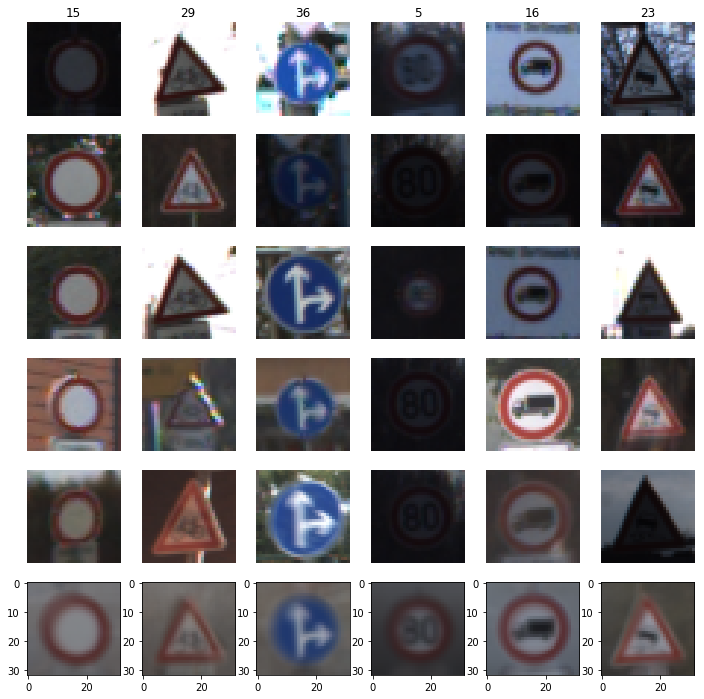

In [90]:
number_of_class_to_plot = 6
number_of_images_per_class = 5

class_indxs = list(set(y_train))
class_to_plot = np.random.choice(class_indxs, number_of_class_to_plot, replace=False)
fig, ax = plt.subplots(figsize=(12,12))

for y, cls in enumerate(class_to_plot):
    idx = np.flatnonzero(y_train == cls)
    idx = np.random.choice(idx, number_of_images_per_class, replace=False)
    for i, idx in enumerate(idx):
        plt_idx = i * number_of_class_to_plot + y + 1
        plt.subplot(number_of_images_per_class + 1, number_of_class_to_plot, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(class_indxs[cls])
            print (str(class_indxs[cls] )+ ":\t" + id_to_class_name[cls])
#             plt.title(id_to_class_name[cls])
    plt_idx = (i + 1) * number_of_class_to_plot + y + 1
    plt.subplot(number_of_images_per_class + 1, number_of_class_to_plot, plt_idx)
    mean_image = np.mean(X_train[np.flatnonzero(y_train == cls)], axis=0)
    
    plt.imshow(mean_image.astype('uint8'))

# plt.tight_layout()
plt.show()

## Number of examples per class


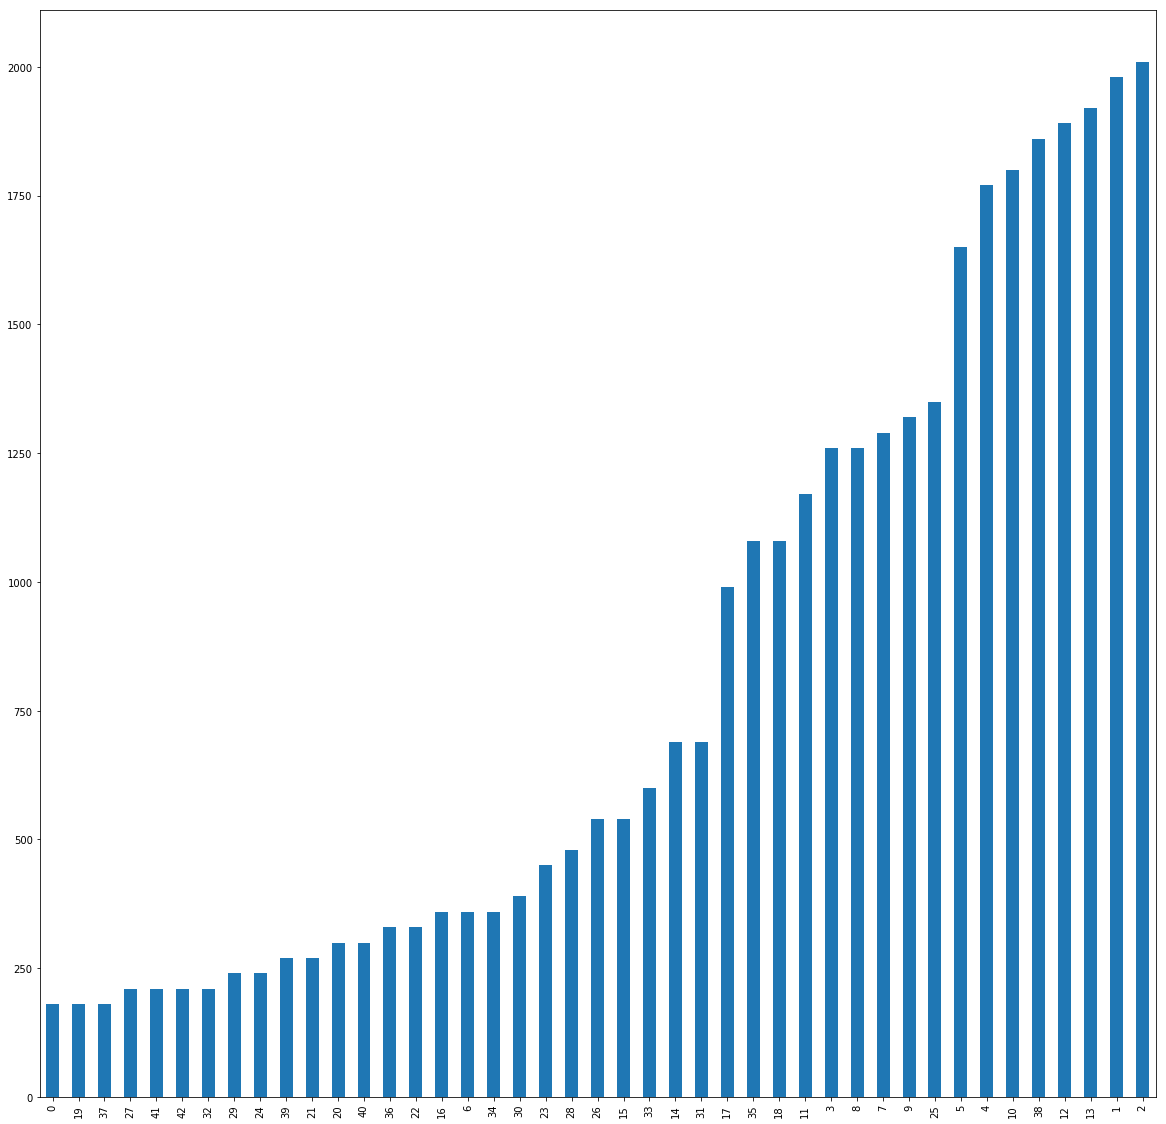

In [10]:
train_series = pd.Series(y_train)
train_series.value_counts(sort=False).sort_values().plot(kind='bar', figsize=(20,20))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### 2.1 Convert images to float

In [ ]:
# ignore

### 2.2. Convert to  gray scale

In [91]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    return (image_data - 128.0)/128.0 

In [92]:
import cv2
def resize_image(image):
    if image.shape[0] != 32 or image.shape[1] != 32 or image.shape[2] != 3:
        print ("Resizing " + str(image.shape))
        image_resize = cv2.resize(image, (32,32), interpolation=cv2.INTER_AREA)
        image_resize = cv2.cvtColor(image_resize, cv2.COLOR_RGB2BGR)
        return image_resize
    return image
    

def convert_to_gray_scale(image):
    image = resize_image(image)
    return cv2.cvtColor(image.astype(np.float32), cv2.COLOR_RGB2GRAY)


In [93]:
def convert_dataset_grayscale(data):
    data_grays = np.ndarray((len(data), 32, 32, 1), dtype=np.float32)
    for index in range(0, len(data)):
        abc = convert_to_gray_scale(data[index])
        data_grays[index] = abc[:,:,  np.newaxis]
    return data_grays


In [94]:
print ("Convert images to grayscale")
X_train_gray = convert_dataset_grayscale(X_train)
X_valid_gray = convert_dataset_grayscale(X_valid)
X_test_gray = convert_dataset_grayscale(X_test)

print (X_train[10].shape)
print (X_train_gray[10].shape)
print (X_valid_gray[10].shape)

print (X_train[0][0][0][0])
print (X_train_gray[0][0][0][0])
print (type(X_train[0][0][0][0]))
print (type(X_train_gray[0][0][0][0]))
print ("done")

Convert images to grayscale
(32, 32, 3)
(32, 32, 1)
(32, 32, 1)
28
25.783
<class 'numpy.uint8'>
<class 'numpy.float32'>
done


In [95]:
print(np.mean(X_train_gray), np.std(X_train_gray))
print(np.mean(X_valid_gray), np.std(X_valid_gray))


81.9165 66.1339
82.7523 68.0585


### 2.3. Normalize gray scaled images

In [96]:
print ("Normalizing grayscaled images...")
X_train_gray_norm = normalize_grayscale(X_train_gray)
X_valid_gray_norm = normalize_grayscale(X_valid_gray)
X_test_gray_norm = normalize_grayscale(X_test_gray)
print ("done")

Normalizing grayscaled images...
done


In [97]:
print(np.mean(X_train_gray_norm), np.std(X_train_gray_norm))
print(np.mean(X_valid_gray_norm), np.std(X_valid_gray_norm))


-0.360028 0.516671
-0.353498 0.531707


In [98]:
print ((X_train[0][0][0][0]))
print ((X_train_gray[0][0][0][0]))
print ((X_test_gray_norm[0][0][0][0]))
print (type(X_train[0][0][0][0]))
print (type(X_train_gray[0][0][0][0]))
print (type(X_test_gray_norm[0][0][0][0]))

28
25.783
0.0633829
<class 'numpy.uint8'>
<class 'numpy.float32'>
<class 'numpy.float32'>


Original shape: (32, 32, 3)
Gray shape: (32, 32, 1)
normed shape: (32, 32, 1)
Image size: (32, 32, 3)
Image squeeze: (32, 32, 3)
X_Train: 28
X_gray: 25.783
X_gray normed: -0.79857


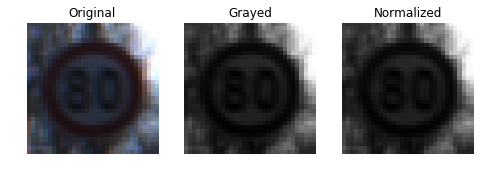

In [99]:
def plot_original_normalized_image(X_train, X_train_gray, X_normed):
    random_index_image = np.random.randint(len(X_train))
    org = X_train[random_index_image]
    grayed = X_train_gray[random_index_image]
    normed = X_normed[random_index_image]
    print ("Original shape:", org.shape)
    print ("Gray shape:", grayed.shape)
    print ("normed shape:", normed.shape) 
    fig, axes = plt.subplots(1, 3, figsize=(8,8))
    print ("Image size:", org.shape)
    print ("Image squeeze:", org.squeeze().shape)

    axes[0].imshow(org)
    axes[0].set_title("Original")
    axes[0].axis('off')
    
    axes[1].imshow(grayed.squeeze(), cmap='gray')
    axes[1].axis('off')
    axes[1].set_title("Grayed")

    axes[2].imshow(normed.squeeze(), cmap='gray')
    axes[2].axis('off')
    axes[2].set_title("Normalized")

plot_original_normalized_image(X_train, X_train_gray, X_train_gray_norm)    

print ("X_Train:", X_train[0][0][0][0])
print ("X_gray:", X_train_gray[0][0][0][0])
print ("X_gray normed:", X_train_gray_norm[0][0][0][0])

### Model Architecture

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [100]:
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

print('done')

done


In [101]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

def LeNet(x, n_classes):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    mu = 0
    sigma = 0.1
    filter_size_layer_1 = 5
    channels = 1
    num_filters = 6

    weights_layer_1 = tf.Variable(
        tf.truncated_normal(shape=(filter_size_layer_1, filter_size_layer_1, channels,
                             num_filters), mean = mu, stddev = sigma))
    base_layer_1 = tf.Variable(tf.zeros(num_filters))
    conv1   = tf.nn.conv2d(x, weights_layer_1, strides=[1, 1, 1, 1], padding='VALID') + base_layer_1

    # TODO: Activation.
    relu_1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # strides = 2, filter size = 2
    layer_1_out = tf.nn.max_pool(relu_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    weights_layer_2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    base_layer_2 = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(layer_1_out, weights_layer_2, strides=[1, 1, 1, 1], padding='VALID') + base_layer_2

    # TODO: Activation.
    relu_2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    layer_1_out = tf.nn.max_pool(relu_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(layer_1_out)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    weights_layer_fc0 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    base_layer_fc0 = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, weights_layer_fc0) + base_layer_fc0

    # TODO: Activation.
    fc1_relu = tf.nn.relu(fc1)

    # Dropout
    fc1_relu = tf.nn.dropout(fc1_relu, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    weights_layer_fc1 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    base_layer_fc1 = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1_relu, weights_layer_fc1) + base_layer_fc1

    # TODO: Activation.
    fc2_relu = tf.nn.relu(fc2)

    # Dropout
    fc2_relu = tf.nn.dropout(fc2_relu, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    weights_layer_fc2 = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    base_layer_fc2 = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2_relu, weights_layer_fc2) + base_layer_fc2

    return logits, weights_layer_1, weights_layer_2, weights_layer_fc0, weights_layer_fc1,\
        weights_layer_fc2


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [22]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [116]:
from sklearn.utils import shuffle
tf.reset_default_graph() 

graph = tf.Graph()

with graph.as_default():
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))    
    y = tf.placeholder(tf.int32, (None))
    keep_prob = tf.placeholder(tf.float32) # probability to keep units
    one_hot_y = tf.one_hot(y, 43)
    learning_rate = tf.placeholder(tf.float32) # probability to keep units

    regularied_beta = tf.placeholder(tf.float32)
    
    logits_weights = LeNet(x, n_classes)
    logits = logits_weights[0]
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

    loss_operation =  tf.reduce_mean(cross_entropy 
        + regularied_beta * tf.nn.l2_loss(logits_weights[1]) 
        + regularied_beta * tf.nn.l2_loss(logits_weights[2])
        + regularied_beta * tf.nn.l2_loss(logits_weights[3]) 
        + regularied_beta * tf.nn.l2_loss(logits_weights[4]))
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training_operation = optimizer.minimize(loss_operation)

    softmax_logits = tf.nn.softmax(logits)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples


def run_for_a_session(session, learning_rate_value, keep_prob_value, regularied_beta_val,
                      X_train_data, y_train_data, X_valid_data, y_valid_data, EPOCHS = 15, verbose = False):
    session.run(tf.global_variables_initializer())
    num_examples = len(X_train_data)

    print("Training...")
    print()
    result = {

    }
    valid_accuracies = []
    for i in range(EPOCHS):
        X_train_model, y_train_model = shuffle(X_train_data, y_train_data)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_model[offset:end], y_train_model[offset:end]
            import pdb
#             pdb.set_trace()
            feed_dict = { x: batch_x, y: batch_y, 
              keep_prob: keep_prob_value,
              learning_rate: learning_rate_value,
              regularied_beta: regularied_beta_val
            }
            session.run(training_operation, feed_dict=feed_dict)

        train_accuracy = evaluate(X_train_gray_norm, y_train)
        validation_accuracy = evaluate(X_valid_data, y_valid_data)
        if verbose == True:
            print("EPOCH {} ...".format(i+1))
            print("Train Accuracy = {:.3f}".format(train_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()


        valid_accuracies.append(validation_accuracy)

    result['valid_acc'] = valid_accuracies
    return result
    
def run_model_with_cv_params(learning_rate_value, keep_prob_value, regularied_beta_val,
                             X_train_data, y_train_data, X_valid_data, y_valid_data, EPOCHS = 15, verbose = False):
    
    with tf.Session(graph=graph, config=tf.ConfigProto(log_device_placement=True)) as sess:
        return run_for_a_session(sess, learning_rate_value, keep_prob_value, regularied_beta_val,
                 X_train_data, y_train_data, X_valid_data, y_valid_data, EPOCHS = EPOCHS, verbose = verbose)


In [103]:
def print_time(start_time, message):
    end_cv_time = time.time()
    total_mins = (end_cv_time - start_time) /(60.0 )
    total_hours = (end_cv_time - start_time) /(60.0 * 60.0 )
    print (message)
    print("\tTotal time taken hours = {:.3f}".format(total_hours))
    print("\tTotal time taken mins = {:.3f}".format(total_mins))


In [104]:
import pickle
pickled_cv_results_path = "cv_results_2.pkl"


In [105]:
results_cv = {}

time_per_cv = {}


In [106]:
results_cv = pickle.load(open(pickled_cv_results_path ,"rb" ))
#print (results_cv.keys())
#results_cv

In [30]:

import pdb
import time 
l_rates= [0.0009, 0.0001, 0.001, 0.0008, 0.002, 0.01, 0.1]
dropouts = [0.5, 0.1, 0.001, 0.2, 0.4, 0.0, 0.6, 0.8]
betas = [0, 0.001, 0.002, 0.003, 0.01, 0.02, 0.07, 0.1, 0.4, 0.7, 1]

# l_rates= [0.0009]
# dropouts = [0.5, 0.1]
# betas = [0, 0.001]

total_perm = len(l_rates) * len(dropouts) * len(betas)
print ("Total perm", str(total_perm))
start_cv_time = time.time()
index = 0
for r in l_rates:
    for drops in dropouts:
        for beta in betas:
            index += 1
            if (r, drops, beta) not in results_cv:
                start_current_cv_time = time.time()
                print ("****************************************************")
                print (str(index) +  " of " + str(total_perm))
                print ("Running for %.5f, %0.5f, %0.5f, " %(r, drops, beta))
                result = run_model_with_cv_params(r, drops, beta, X_train_gray_norm, y_train, 
                                                  X_valid_gray_norm, y_valid, EPOCHS=12)

                valid_accs = result['valid_acc']
                results_cv[r, drops, beta] = valid_accs[-1]
                print ("Final Accuracy %.5f, " %(valid_accs[-1]))
                end_current_cv_time = time.time()
                time_per_cv[r, drops, beta] = end_current_cv_time - start_current_cv_time
                print_time(start_current_cv_time, "This CV time.")
                print_time(start_cv_time, "So far all CV time.")
                
                print ("****************************************************")
            if (index % 5 == 0):    
                print ("Pickling..")    
                pickle.dump( results_cv, open(pickled_cv_results_path, "wb" ) )                
                print ("done..")    

print ("Pickling..")    
pickle.dump(results_cv, open(pickled_cv_results_path, "wb" ) )                
print ("done..")    

print_time(start_cv_time, "All done")


Total perm 616
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
Pickling..
done..
****************************************************
257 of 616
Run

In [47]:
import time
start_cv_time = time.time()
run_model_with_cv_params(0.0009, 0.5, 0, X_train_gray_norm, y_train, X_valid_gray_norm, y_valid, EPOCHS=3, verbose=True)
end_cv_time = time.time()
total_mins = (end_cv_time - start_cv_time) /(60.0 )

total_hours = (end_cv_time - start_cv_time) /(60.0 * 60.0 )
print("Total time taken hours = {:.3f}".format(total_hours))
print("Total time taken mins = {:.3f}".format(total_mins))


Training...

EPOCH 1 ...
Train Accuracy = 0.624
Validation Accuracy = 0.566

EPOCH 2 ...
Train Accuracy = 0.834
Validation Accuracy = 0.792

EPOCH 3 ...
Train Accuracy = 0.890
Validation Accuracy = 0.854

Total time taken hours = 0.011
Total time taken mins = 0.676


In [25]:
# print (end_cv_time - start_cv_time)
# print (start_cv_time)

### Best model

In [107]:
# Print out results.
best_val = -1
best_params = None

for keys in sorted(results_cv):
    (r, drops, beta) = keys
    accuray_val = results_cv[keys]
    print ('learning rate:%e, drop out:%e, beta: %e' % (r, drops ,beta))
    if best_val == -1 or accuray_val  > best_val:
        best_val = accuray_val
        best_params = keys
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)
(r, drops, beta) = best_params
print (best_params)

val_accuracies = []
num_drops = []
num_betas = []
num_learning_rate = []

import pandas as pd
for key in sorted(results_cv):
    val_accuracies.append(results_cv[key])
    num_learning_rate.append(key[0])
    num_drops.append(key[1])
    num_betas.append(key[2])
        
d = {'learning_rate' : pd.Series(num_learning_rate),
    'dropout' : pd.Series(num_drops),
     'beta': num_betas,
     'valAccuracy': val_accuracies     
}
rows = pd.DataFrame(d)

learning rate:1.000000e-04, drop out:0.000000e+00, beta: 0.000000e+00
learning rate:1.000000e-04, drop out:0.000000e+00, beta: 1.000000e-03
learning rate:1.000000e-04, drop out:0.000000e+00, beta: 2.000000e-03
learning rate:1.000000e-04, drop out:0.000000e+00, beta: 3.000000e-03
learning rate:1.000000e-04, drop out:0.000000e+00, beta: 1.000000e-02
learning rate:1.000000e-04, drop out:0.000000e+00, beta: 2.000000e-02
learning rate:1.000000e-04, drop out:0.000000e+00, beta: 7.000000e-02
learning rate:1.000000e-04, drop out:0.000000e+00, beta: 1.000000e-01
learning rate:1.000000e-04, drop out:0.000000e+00, beta: 4.000000e-01
learning rate:1.000000e-04, drop out:0.000000e+00, beta: 7.000000e-01
learning rate:1.000000e-04, drop out:0.000000e+00, beta: 1.000000e+00
learning rate:1.000000e-04, drop out:1.000000e-03, beta: 0.000000e+00
learning rate:1.000000e-04, drop out:1.000000e-03, beta: 1.000000e-03
learning rate:1.000000e-04, drop out:1.000000e-03, beta: 2.000000e-03
learning rate:1.0000

### best validation accuracy achieved during cross-validation: 0.958050
### parameters (0.002, 0.8, 0)

## Plot the accuracy for each CV params 

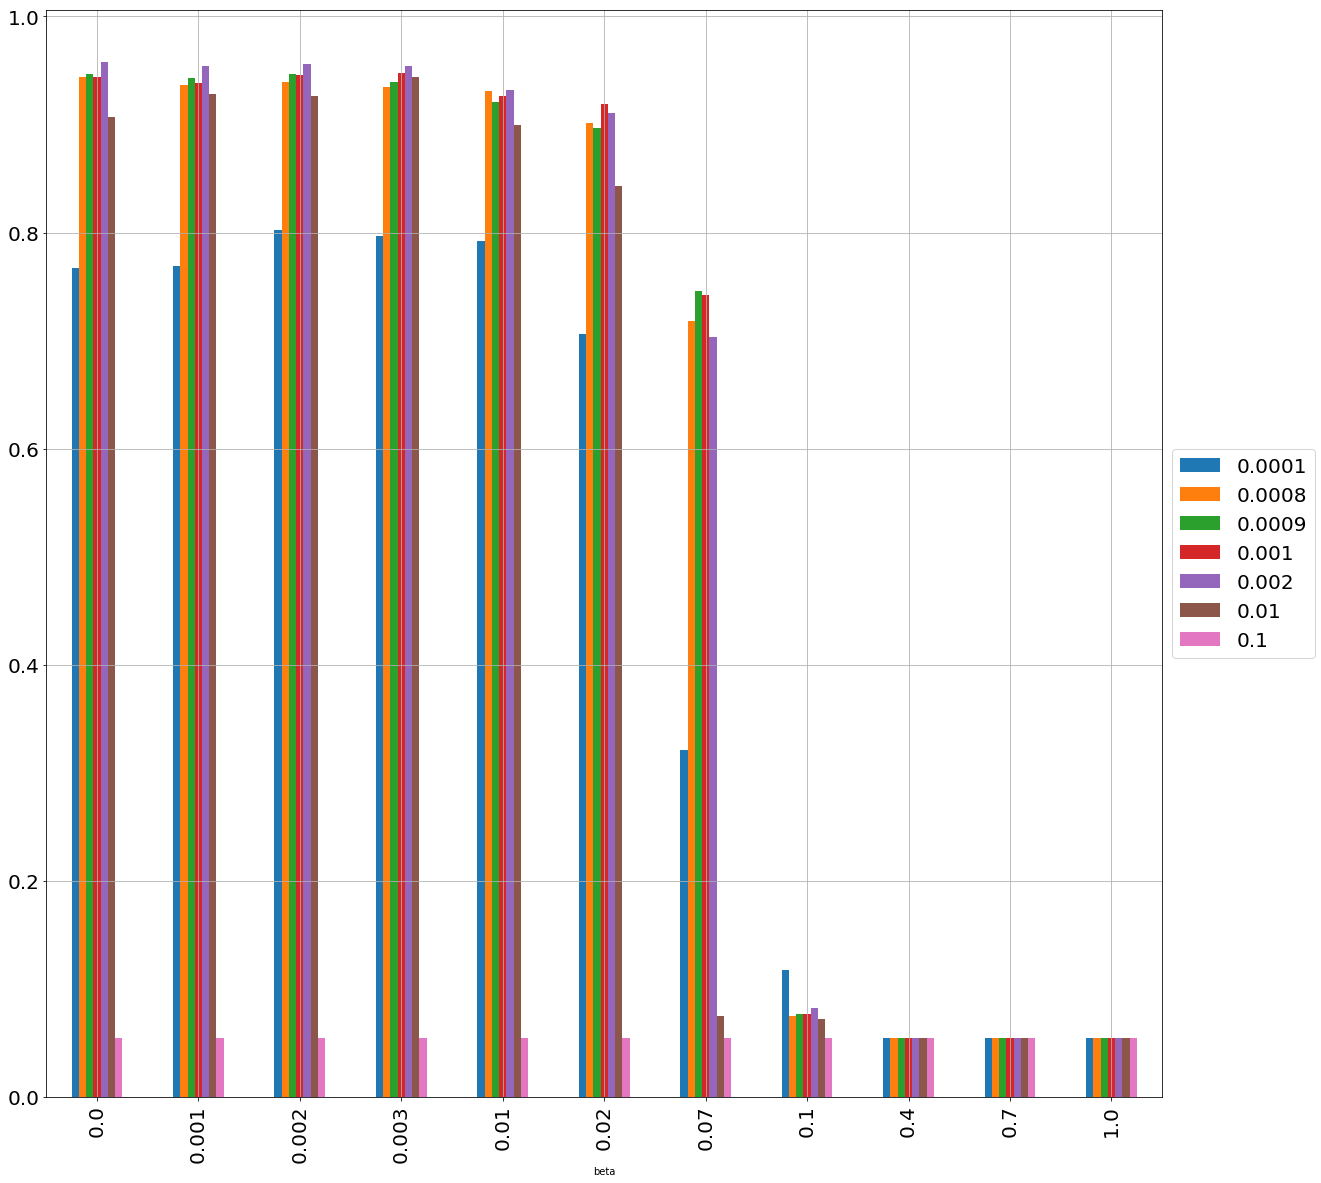

In [27]:
pd.crosstab([rows.beta],[rows.learning_rate ],  
            values=rows.valAccuracy,
            aggfunc=np.max
            ).plot(kind='bar', grid=True,  figsize=(20,20), fontsize=20
            ).legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

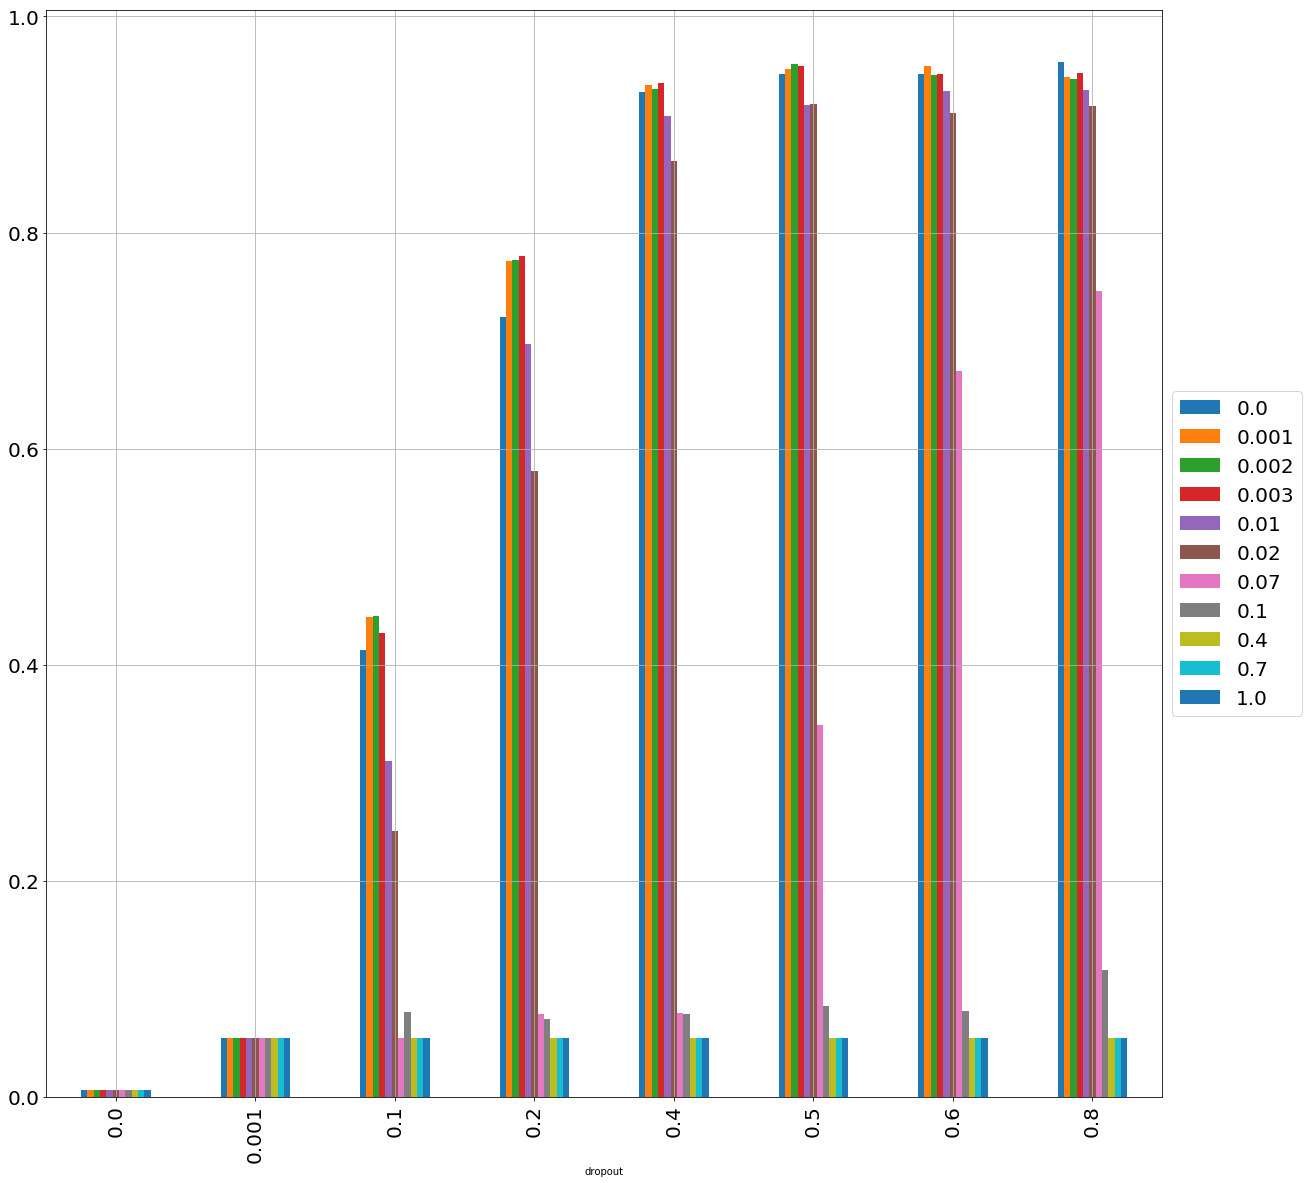

In [28]:
pd.crosstab([rows.dropout],[rows.beta ],  
            values=rows.valAccuracy,
            aggfunc=np.max
            ).plot(kind='bar', grid=True,  figsize=(20,20), fontsize=20
            ).legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [108]:
import os
sample_dir = "data/web_sample_crop/"
test_images_path = os.listdir(sample_dir)
print (test_images_path)
import matplotlib.image as mpimg

['120_speed_crop.png', '30_speed_bike_crop.png', '30_speed_limit.png', '60_speed_crop.png', '70_speed_limit.png', 'pedestrian.png', 'right_sharp_crop.png', 'right_turn_crop.png', 'right_turn_crop_2.png', 'sharp_right_2_crop.png']


In [109]:
image = mpimg.imread(sample_dir + test_images_path[0])

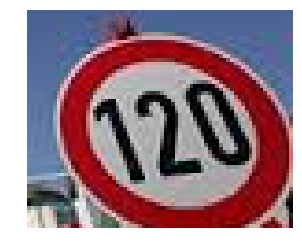

In [110]:
plt.imshow(image)
plt.axis('off')
true_labels_test_images = {
    '120_speed_crop.png' : 8,
    '30_speed_bike_crop.png' : 1,
    '30_speed_limit.png' : 1,
    '60_speed_crop.png' : 3,
    '70_speed_limit.png' : 4,
    'pedestrian.png' : 27,
    'right_sharp_crop.png' : 38,
    'right_turn_crop.png' : 33,
    'right_turn_crop_2.png' : 38,
    'sharp_right_2_crop.png' :38
}

### Load and Output the Images

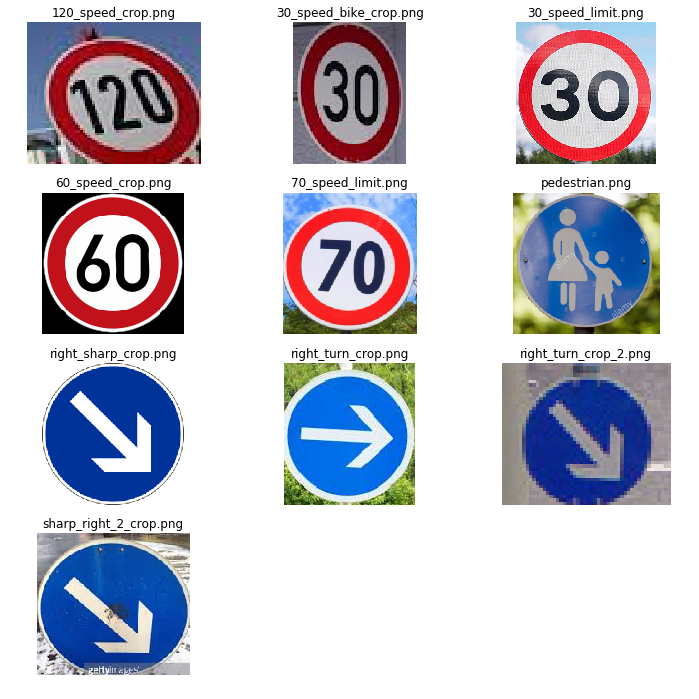

In [111]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
per_row_image = 3
num_rows = (int)(len(test_images_path)/per_row_image + 1)
f, axes = plt.subplots(num_rows, per_row_image, figsize=(12,12))
sample_test_images = []
sample_y_test = []
for rows in range(num_rows):
    for col in range(per_row_image):
        index = (rows * per_row_image) + col
        axes[rows][col].axis('off')
        if (index >= len(test_images_path)):
            continue
        image_path = test_images_path[index]
        image = cv2.imread(sample_dir + image_path)
        sample_test_images.append(image)
        correct_label = true_labels_test_images[image_path]
        sample_y_test.append(correct_label)
        axes[rows][col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[rows][col].set_title(image_path)
        

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

Resizing (59, 72, 3)
Resizing (108, 86, 3)
Resizing (327, 321, 3)
Resizing (145, 145, 3)
Resizing (230, 216, 3)
Resizing (254, 262, 3)
Resizing (225, 225, 3)
Resizing (138, 127, 3)
Resizing (42, 50, 3)
Resizing (171, 184, 3)
121.996 67.1988
-0.0469044 0.524991
Original shape: (230, 216, 3)
Gray shape: (32, 32, 1)
normed shape: (32, 32, 1)
Image size: (230, 216, 3)
Image squeeze: (230, 216, 3)


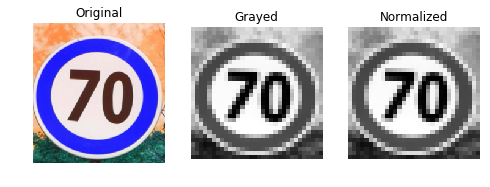

In [114]:
def pre_process_pipline(images, debug=False):
    images_gray = convert_dataset_grayscale(images)
    if debug:
        print (images[0][0][0][0])
        print (images_gray[0][0][0][0])
        print (type(images[0][0][0][0]))
        print (type(images_gray[0][0][0][0]))
    normalized_gray = normalize_grayscale(images_gray)
    return images, images_gray, normalized_gray
  
images, images_gray, sample_normalized_gray = pre_process_pipline(sample_test_images)    

print(np.mean(images_gray), np.std(images_gray))
print(np.mean(sample_normalized_gray), np.std(sample_normalized_gray))
plot_original_normalized_image(images, images_gray, sample_normalized_gray)    


In [115]:
print (len(normalized_gray))

10


### Analyze Performance

## Re train the modle using best params from CV

In [117]:
import pdb
import time
start_cv_time = time.time()
(r, drops, beta) = best_params
print (best_params)


sample_accuracy_logits = None
valid_accuracy_softmax = None
with tf.Session(graph=graph, config=tf.ConfigProto(log_device_placement=True)) as sess_abc:
    saver = tf.train.Saver()
    print (r, drops, beta)
    result  = run_for_a_session(sess_abc, r, drops, beta,
             X_train_gray_norm, y_train, X_valid_gray_norm, y_valid, EPOCHS = 15, verbose = True)
    print ("Validation Accuracy " + str(result['valid_acc'][-1]))
    valid_accuracy_softmax = sess_abc.run([accuracy_operation, softmax_logits], 
                       feed_dict={x: X_valid_gray_norm, y: y_valid, keep_prob: 1.0})
    sample_accuracy_logits = sess_abc.run([accuracy_operation, logits], 
                       feed_dict={x: sample_normalized_gray, y: sample_y_test, keep_prob: 1.0})

end_cv_time = time.time()
total_mins = (end_cv_time - start_cv_time) /(60.0 )

total_hours = (end_cv_time - start_cv_time) /(60.0 * 60.0 )
print("Total time taken hours = {:.3f}".format(total_hours))
print("Total time taken mins = {:.3f}".format(total_mins))
    

(0.002, 0.8, 0)
0.002 0.8 0
Training...

EPOCH 1 ...
Train Accuracy = 0.883
Validation Accuracy = 0.812

EPOCH 2 ...
Train Accuracy = 0.958
Validation Accuracy = 0.893

EPOCH 3 ...
Train Accuracy = 0.972
Validation Accuracy = 0.905

EPOCH 4 ...
Train Accuracy = 0.980
Validation Accuracy = 0.933

EPOCH 5 ...
Train Accuracy = 0.988
Validation Accuracy = 0.929

EPOCH 6 ...
Train Accuracy = 0.990
Validation Accuracy = 0.938

EPOCH 7 ...
Train Accuracy = 0.992
Validation Accuracy = 0.927

EPOCH 8 ...
Train Accuracy = 0.993
Validation Accuracy = 0.934

EPOCH 9 ...
Train Accuracy = 0.995
Validation Accuracy = 0.934

EPOCH 10 ...
Train Accuracy = 0.994
Validation Accuracy = 0.917

EPOCH 11 ...
Train Accuracy = 0.995
Validation Accuracy = 0.932

EPOCH 12 ...
Train Accuracy = 0.995
Validation Accuracy = 0.944

EPOCH 13 ...
Train Accuracy = 0.997
Validation Accuracy = 0.941

EPOCH 14 ...
Train Accuracy = 0.996
Validation Accuracy = 0.946

EPOCH 15 ...
Train Accuracy = 0.998
Validation Accuracy = 

In [132]:
len(np.max(valid_accuracy_softmax[1], axis=1))

4410

In [123]:
(valid_accuracy_softmax[1][1][41])

0.73021805

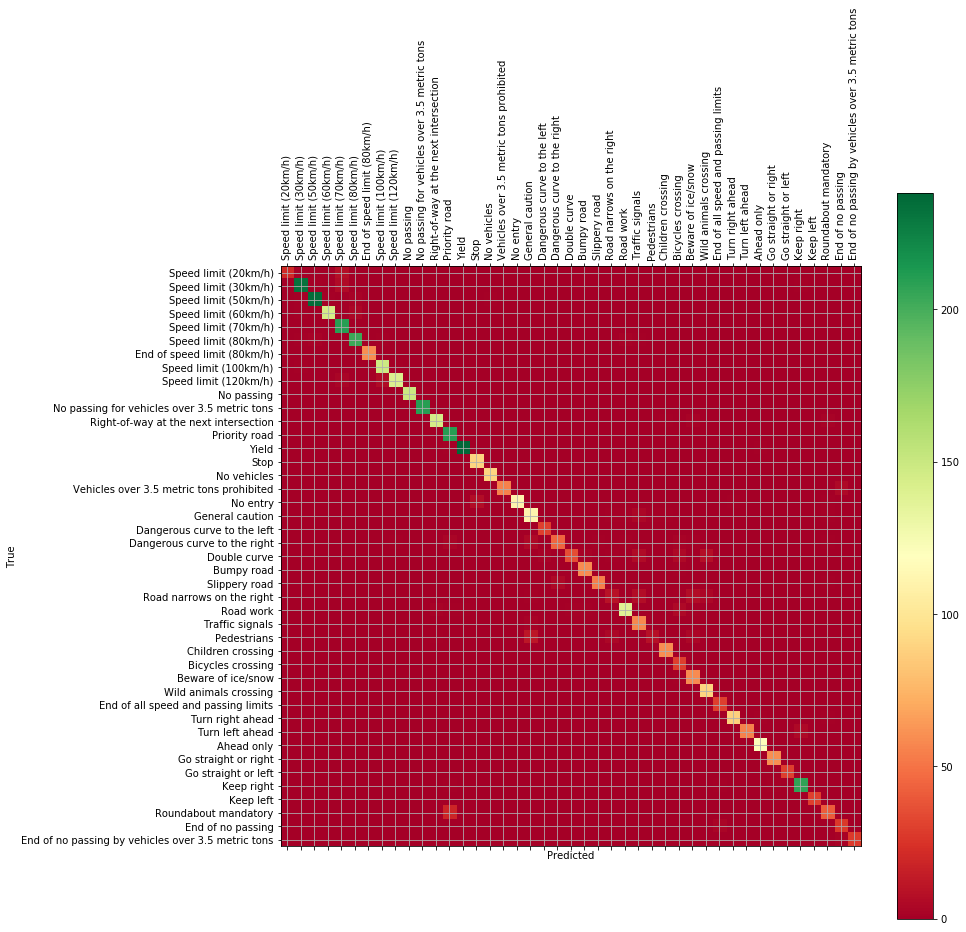

In [168]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from pylab import rcParams
from matplotlib import cm as cm

cmap = cm.get_cmap('Greens')
cmap = cm.get_cmap('YlGnBu')
cmap = cm.get_cmap('RdYlGn')

# https://github.com/kapild/notes/blob/master/blog_datascience/blog_plot_similarity_using_matrix.md
def plot_confusion_matrix(correct_class, predicted_class, labels):
    cm = confusion_matrix(y_true=correct_class,
                          y_pred=predicted_class)

    plt.figure(figsize=(40,40))
    rcParams['figure.figsize'] = 13, 13
    cax = plt.matshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid(True)
    plt.colorbar(cax, )
    tick_marks = np.arange(n_classes)
#     plt.title('Confusion matrix for validation data set')
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels, rotation=0)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
        
        
predicted_class = np.argmax(valid_accuracy_softmax[1], axis=1)

labels = []
for index in range(n_classes):
    labels.append(id_to_class_name[index])
plot_confusion_matrix(y_valid, predicted_class, labels)        

In [134]:
len(sample_accuracy_logits[1])

10

In Correct Precition:25, actual:8
Correct Precition:1, actual:1
Correct Precition:1, actual:1
In Correct Precition:2, actual:3
Correct Precition:4, actual:4
In Correct Precition:18, actual:27
Correct Precition:38, actual:38
In Correct Precition:17, actual:33
Correct Precition:38, actual:38
In Correct Precition:2, actual:38


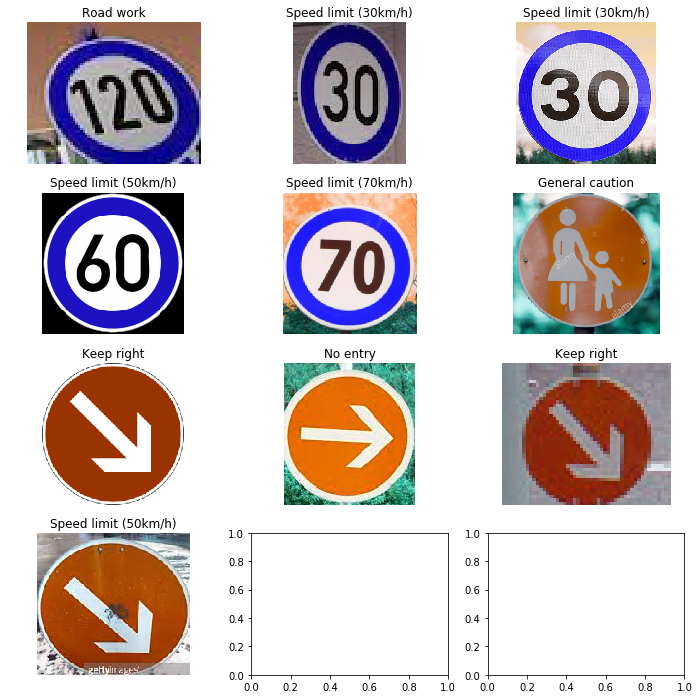

In [76]:
# Print predicted label as a title to the image.
total_correct_prediction = []
per_row_image = 3
num_rows = (int)(len(xyz[1])/per_row_image + 1)
f, axes = plt.subplots(num_rows, per_row_image, figsize=(12,12))
sample_test_images = []
for rows in range(num_rows):
    for col in range(per_row_image):
        index = (rows * per_row_image) + col
#         pdb.set_trace()
        if (index >= len(xyz[1])):
            break
        logits_abc = xyz[1][index]
        index_class = np.argmax(logits_abc)
        if (index_class == sample_y_test[index]):
            print ("Correct Precition:" + str(index_class) + ", actual:" + str(sample_y_test[index]))
            total_correct_prediction.append(1)
        else:
            print ("In Correct Precition:" + str(index_class) + ", actual:" + str(sample_y_test[index]))
            total_correct_prediction.append(0)
            
        image = images[index]
        axes[rows][col].imshow(image)
        axes[rows][col].set_title(id_to_class_name[index_class])
        axes[rows][col].axis('off')



In [48]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [234]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


## Accuracy on test samples of 10 images

In [75]:
print (str(np.mean(total_correct_prediction)))

0.5


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [77]:
test_images_logits = xyz[1]
top_k = 5

for index in range(0, len(test_images_logits)):
    soft_max_prob = softmax(test_images_logits[index])
    
    top_k_probs =  (np.flip(soft_max_prob[soft_max_prob.argsort()][-top_k:], 0))  
    print (id_to_class_name[np.argmax(soft_max_prob)]) 
    out_prop_str = ""
    for prop in top_k_probs:
        out_prop_str += "{:.3f}".format(prop) + ","
    print ("Top 5:" + out_prop_str)
    print()
        
    

Road work
Top 5:0.713,0.255,0.024,0.006,0.000,

Speed limit (30km/h)
Top 5:1.000,0.000,0.000,0.000,0.000,

Speed limit (30km/h)
Top 5:0.924,0.074,0.001,0.000,0.000,

Speed limit (50km/h)
Top 5:0.595,0.391,0.011,0.003,0.000,

Speed limit (70km/h)
Top 5:1.000,0.000,0.000,0.000,0.000,

General caution
Top 5:0.696,0.304,0.000,0.000,0.000,

Keep right
Top 5:1.000,0.000,0.000,0.000,0.000,

No entry
Top 5:0.992,0.008,0.000,0.000,0.000,

Keep right
Top 5:1.000,0.000,0.000,0.000,0.000,

Speed limit (50km/h)
Top 5:0.998,0.001,0.001,0.000,0.000,



---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [124]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [78]:
#outputFeatureMap(X_train_gray_norm[0], conv1)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# Run the model on Test data set 

### Step 1: With best CV params re-train the model 

In [170]:
test_data_tuples = None
with tf.Session(graph=graph, config=tf.ConfigProto(log_device_placement=True)) as sess_abc:
    result = run_for_a_session(sess_abc, r, drops, beta,
             X_train_gray_norm, y_train, X_valid_gray_norm, y_valid, EPOCHS = 15, verbose = False)
    print ("Validation Accuracy " + str(result['valid_acc'][-1]))
    test_data_tuples = sess_abc.run([accuracy_operation, logits, softmax_logits], 
                       feed_dict={x: X_test_gray_norm, y: y_test, keep_prob: 1.0})
    print ("Test Accuracy " + str(test_data_tuples[0]))
    print (".done")


Training...

Validation Accuracy 0.936281179138
Test Accuracy 0.918607
.done


## Test Accuracy 0.918607

### Step2: For few samples, output softmax accuracy 

In [172]:
start = 500
end = 515
test_images_logits = test_data_tuples[1][start:end]
top_k = 5


for index in range(0, len(test_images_logits)):
    soft_max_prob = softmax(test_images_logits[index])
    
    top_k_probs =  (np.flip(soft_max_prob[soft_max_prob.argsort()][-top_k:], 0))  
    print (id_to_class_name[np.argmax(soft_max_prob)]) 
    out_prop_str = ""
    for prop in top_k_probs:
        out_prop_str += "{:.3f}".format(prop) + ","
    print ("Top 5:" + out_prop_str)
    print()
        
    

Bumpy road
Top 5:1.000,0.000,0.000,0.000,0.000,

Wild animals crossing
Top 5:0.996,0.003,0.001,0.000,0.000,

No passing
Top 5:0.990,0.010,0.000,0.000,0.000,

Speed limit (100km/h)
Top 5:1.000,0.000,0.000,0.000,0.000,

Slippery road
Top 5:0.994,0.004,0.002,0.000,0.000,

Speed limit (70km/h)
Top 5:0.999,0.001,0.000,0.000,0.000,

End of all speed and passing limits
Top 5:0.998,0.001,0.000,0.000,0.000,

End of no passing by vehicles over 3.5 metric tons
Top 5:0.999,0.001,0.000,0.000,0.000,

Speed limit (30km/h)
Top 5:1.000,0.000,0.000,0.000,0.000,

Speed limit (60km/h)
Top 5:0.998,0.002,0.000,0.000,0.000,

Speed limit (120km/h)
Top 5:1.000,0.000,0.000,0.000,0.000,

Speed limit (50km/h)
Top 5:1.000,0.000,0.000,0.000,0.000,

Road work
Top 5:0.949,0.050,0.001,0.000,0.000,

Bumpy road
Top 5:0.972,0.028,0.000,0.000,0.000,

Keep right
Top 5:1.000,0.000,0.000,0.000,0.000,



### Step 4: Plot some of the images

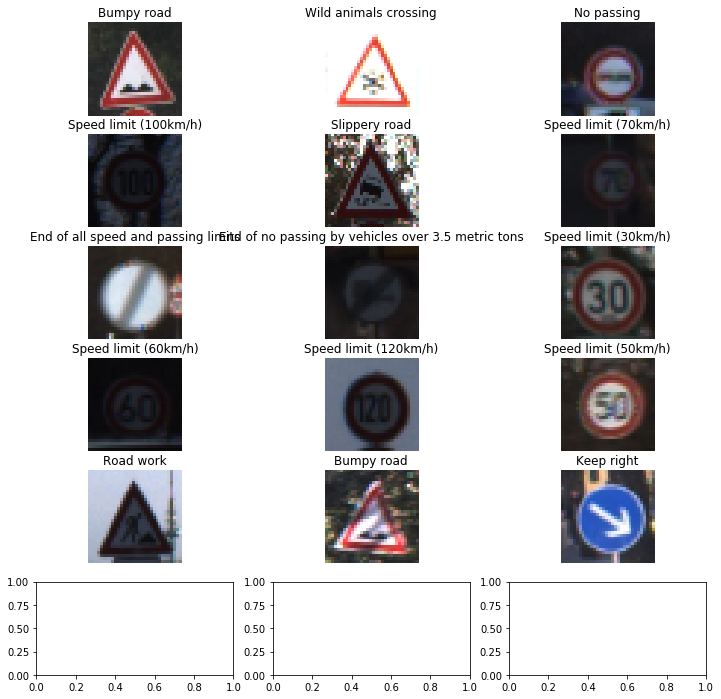

In [173]:
# Print predicted label as a title to the image.
per_row_image = 3
num_rows = (int)(len(test_images_logits)/per_row_image + 1)
f, axes = plt.subplots(num_rows, per_row_image, figsize=(12,12))
sample_test_images = []
for rows in range(num_rows):
    for col in range(per_row_image):
        index = (rows * per_row_image) + col
        if (index >= len(test_images_logits)):
            break
        logits_abc = test_images_logits[index]
        index_class = np.argmax(logits_abc)
        true_index = y_test[start + index]
        image = X_test[start + index]
        axes[rows][col].imshow(image)
        axes[rows][col].set_title(id_to_class_name[index_class])
        axes[rows][col].axis('off')



### Plot confusion matrix for Test data set

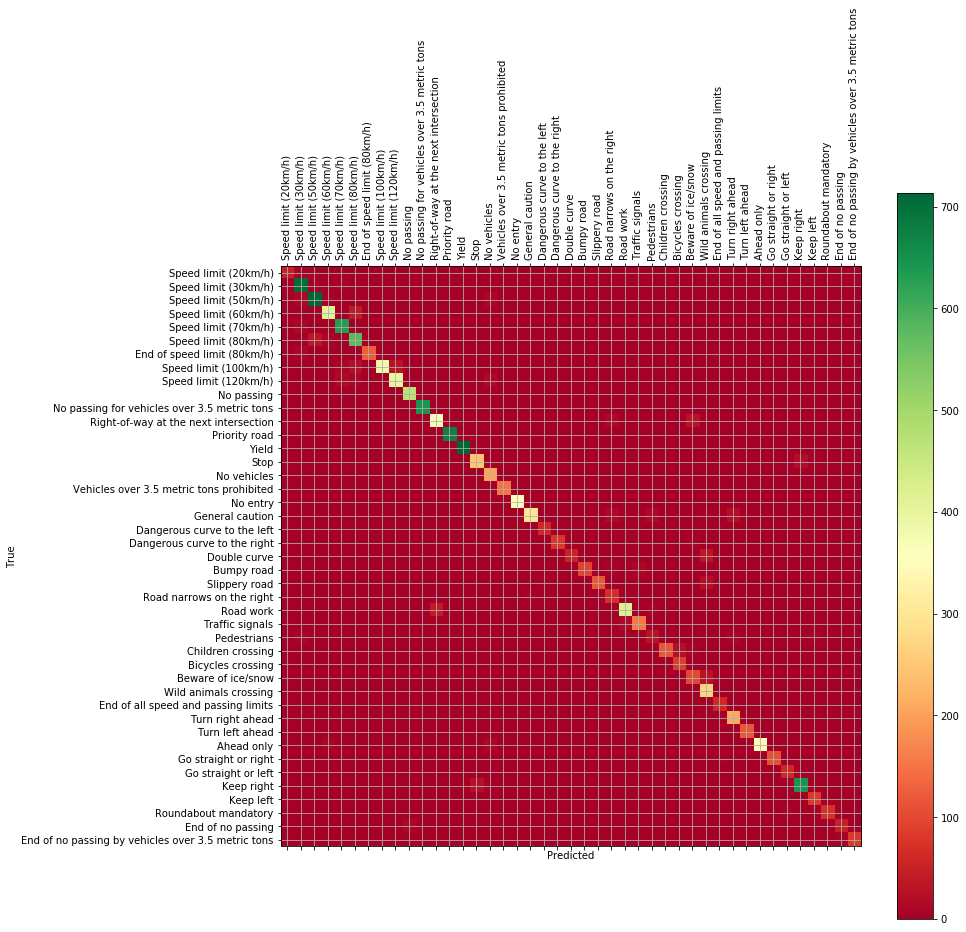

In [174]:
test_predicted_class = np.argmax(test_data_tuples[2], axis=1)

plot_confusion_matrix(y_test, test_predicted_class, labels)        

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 